In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import csv

In [2]:
cur_path = '/Users/sonalichaudhari/Desktop/ADS_Project/Data'
df = pd.read_csv(open(cur_path+'/dataformodels.csv','rU'), encoding='utf-8')

In [3]:
df.shape

(1162752, 42)

In [4]:
df['CRSDep_hour'] = df['CRSDepTime'].apply(lambda x: str(x)[:-2])
df['CRSDep_min'] = df['CRSDepTime'].apply(lambda x: str(x)[1:3] if len(str(x))==3 else  str(x)[2:4])
df = df.replace('', 0)
df['CRSArr_hour'] = df['CRSArrTime'].apply(lambda x: str(x)[:-2])
df['CRSArr_min'] = df['CRSArrTime'].apply(lambda x: str(x)[1:3] if len(str(x))==3 else  str(x)[2:4])
df = df.replace('', 0)

In [5]:
df['Scheduled_Dep_T'] = df.CRSDep_hour.astype(str).str.cat(df.CRSDep_min.astype(str), sep=':')
df['Scheduled_Arr_T'] = df.CRSArr_hour.astype(str).str.cat(df.CRSArr_min.astype(str), sep=':')

In [6]:
df[['CRSDep_hour','CRSDep_min','CRSArr_hour','CRSArr_min']] = df[['CRSDep_hour','CRSDep_min','CRSArr_hour','CRSArr_min']].astype(int)

In [7]:
cols = df.columns.tolist()
cols.remove('Flight_Status')
cols.remove('CRSArrTime')
cols.remove('CRSDepTime')
cols.remove('DepDelayMinutes')
len(cols)

38

In [22]:
X = df[s]
y = df['DepDelayMinutes']

In [23]:
X.columns

Index(['Year', 'Day', 'Month', 'Week', 'Origin', 'Dest', 'UniqueCarrier',
       'OriginWind', 'OriginPrecip', 'CRSDep_hour', 'CRSArr_hour',
       'CRSElapsedTime'],
      dtype='object')

In [24]:
len(X.columns)

12

In [41]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

X['carrier'] = label_encoder.fit_transform(X['UniqueCarrier'])
X['origin'] = label_encoder.fit_transform(X['Origin'])
X['dest'] = label_encoder.fit_transform(X['Dest'])

X = X._get_numeric_data()

In [ ]:
X.columns.tolist()

In [26]:
c=0
for i in X.columns.tolist():
    print(c,'',i)
    c=c+1

0  Year
1  Day
2  Month
3  Week
4  Origin
5  Dest
6  UniqueCarrier
7  OriginWind
8  OriginPrecip
9  CRSDep_hour
10  CRSArr_hour
11  CRSElapsedTime
12  carrier
13  origin
14  dest


Feature ranking:
1. feature 1 (0.277870)
2. feature 2 (0.180482)
3. feature 0 (0.145741)
4. feature 9 (0.045290)
5. feature 3 (0.044930)
6. feature 10 (0.044776)
7. feature 4 (0.044088)
8. feature 5 (0.044025)
9. feature 8 (0.043906)
10. feature 6 (0.043756)
11. feature 11 (0.042784)
12. feature 7 (0.042351)


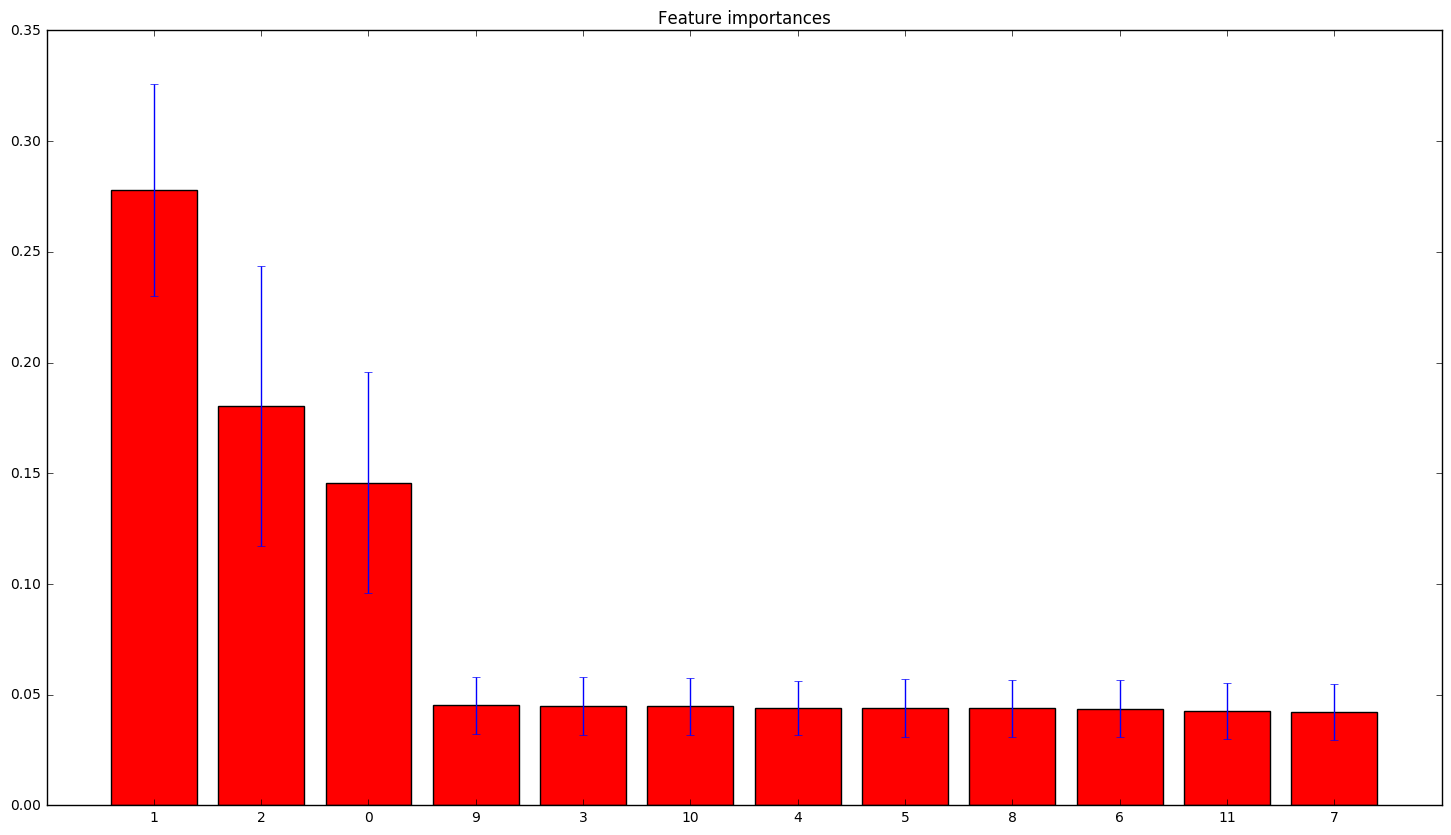

In [28]:
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

# Build a classification task using 3 informative features
X, y = make_classification(n_samples=1000,
                           n_features=12,
                           n_informative=3,
                           n_redundant=0,
                           n_repeated=0,
                           n_classes=2,
                           random_state=0,
                           shuffle=False)

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f],importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(figsize=(18, 10))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

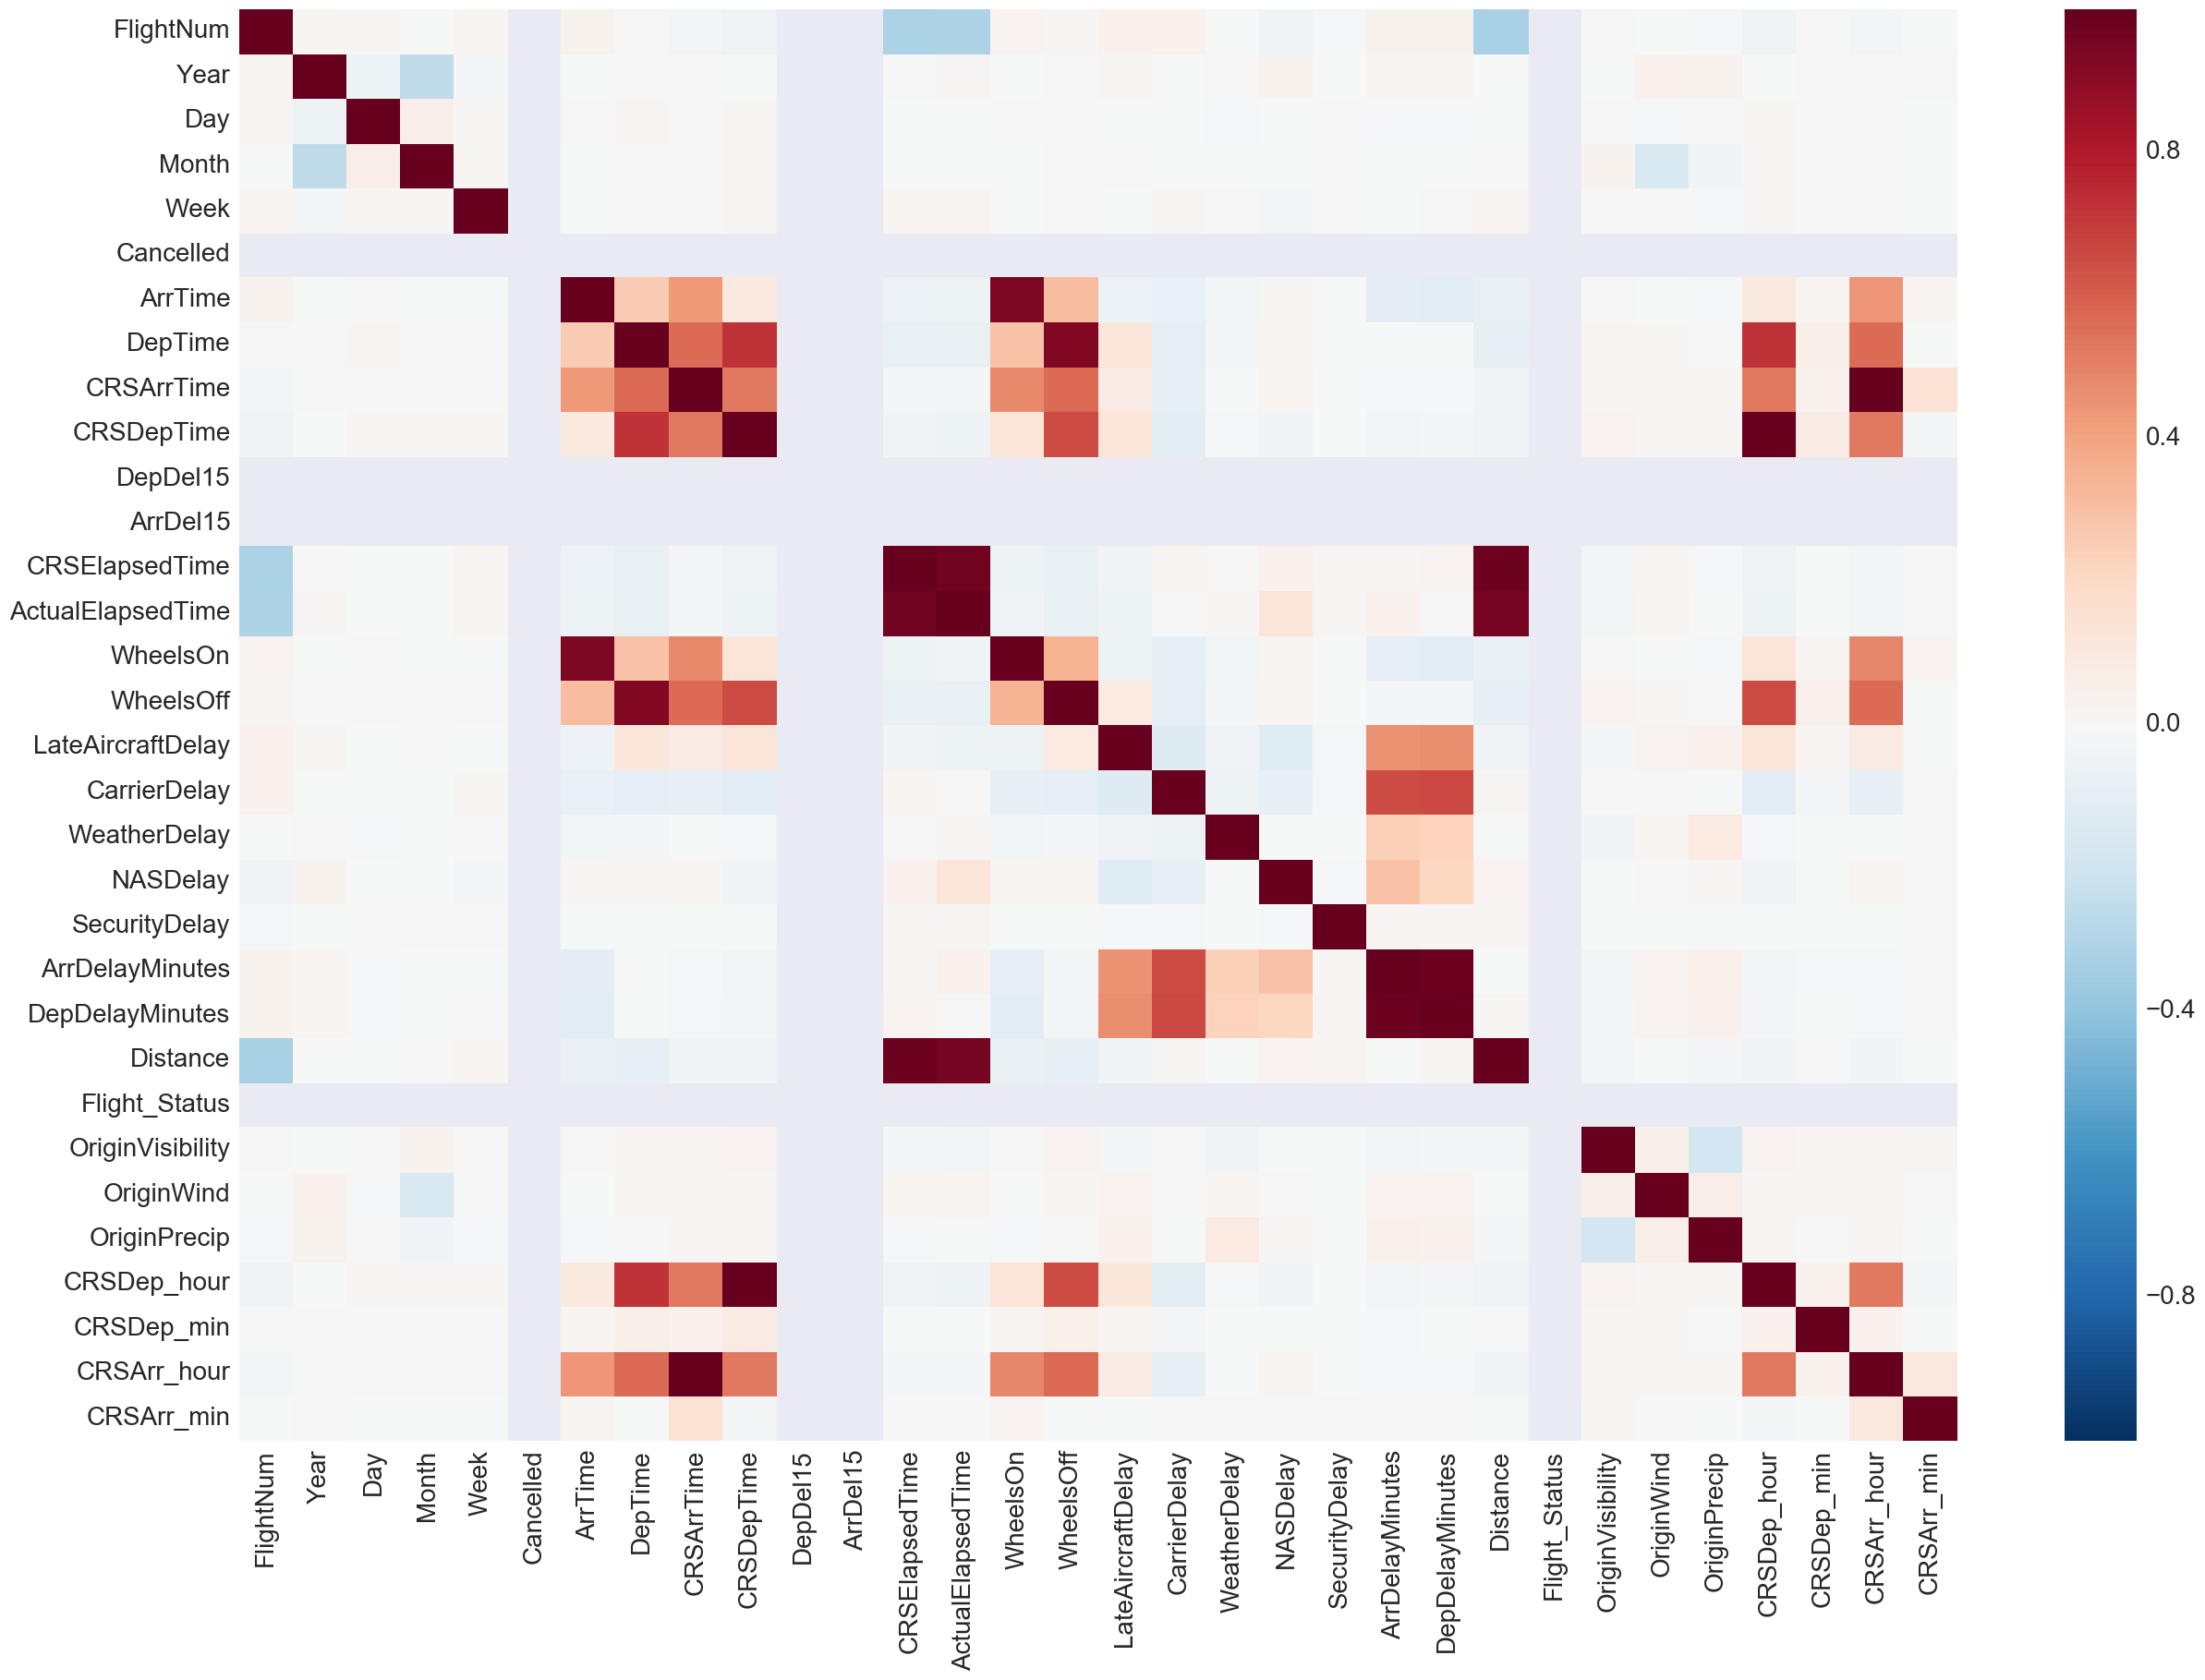

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
color = sns.color_palette()
plt.figure(figsize = (30,20))
sns.set(font_scale = 2)
sns.heatmap(data=df.corr())
plt.show()
plt.gcf().clear()

# PREDICTION

In [50]:
pred = df[df.DepDel15==1]
pred.shape

(1162752, 42)

In [51]:
pred = pred[pred.Flight_Status==1]

In [52]:
pred.columns

Index(['FlightDate', 'FlightNum', 'Year', 'Day', 'Month', 'Week', 'Origin',
       'Dest', 'UniqueCarrier', 'Cancelled', 'ArrTime', 'ArrTimeBlk',
       'DepTime', 'DepTimeBlk', 'CRSArrTime', 'CRSDepTime', 'DepDel15',
       'ArrDel15', 'CRSElapsedTime', 'ActualElapsedTime', 'WheelsOn',
       'WheelsOff', 'LateAircraftDelay', 'CarrierDelay', 'WeatherDelay',
       'NASDelay', 'SecurityDelay', 'ArrDelayMinutes', 'DepDelayMinutes',
       'OriginCityName', 'DestCityName', 'Distance', 'Flight_Status',
       'OriginVisibility', 'OriginWind', 'OriginPrecip', 'CRSDep_hour',
       'CRSDep_min', 'CRSArr_hour', 'CRSArr_min', 'Scheduled_Dep_T',
       'Scheduled_Arr_T'],
      dtype='object')

In [53]:
pred.shape

(1162752, 42)

In [54]:
s = ['Year', 'Day', 'Month', 'Week', 'Origin','Dest', 'UniqueCarrier','OriginWind', 'OriginPrecip',
       'CRSDep_hour','CRSArr_hour','CRSElapsedTime']

In [55]:
len(s)

12

In [56]:
#pred.DepDelayMinutes.sort_values()

In [57]:
X= pred[s]
y = pred['DepDelayMinutes']

In [58]:
X.isnull().sum()

Year              0
Day               0
Month             0
Week              0
Origin            0
Dest              0
UniqueCarrier     0
OriginWind        0
OriginPrecip      0
CRSDep_hour       0
CRSArr_hour       0
CRSElapsedTime    0
dtype: int64

In [59]:
from sklearn import preprocessing, cross_validation

y = np.ravel(y)
# Splitting the data
X_train, X_test, y_train, y_test =  cross_validation.train_test_split(X, y,test_size=0.30,random_state=0)

In [60]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
# Converting the categorical data to numeric 

X_train['carrier'] = label_encoder.fit_transform(X_train['UniqueCarrier'])
X_train['origin'] = label_encoder.fit_transform(X_train['Origin'])
X_train['dest'] = label_encoder.fit_transform(X_train['Dest'])
# X_train['ori_city'] = label_encoder.fit_transform(X_train['OriginCityName'])
# X_train['dest_city'] = label_encoder.fit_transform(X_train['DestCityName'])

X_test['carrier'] = label_encoder.fit_transform(X_test['UniqueCarrier'])
X_test['origin'] = label_encoder.fit_transform(X_test['Origin'])
X_test['dest'] = label_encoder.fit_transform(X_test['Dest'])
# X_test['ori_city'] = label_encoder.fit_transform(X_test['OriginCityName'])
# X_test['dest_city'] = label_encoder.fit_transform(X_test['DestCityName'])

In [61]:
# Getting only the numerical columns

X_train = X_train._get_numeric_data()
X_test = X_test._get_numeric_data()

In [62]:
from sklearn.neural_network import MLPRegressor
nn1 = MLPRegressor(hidden_layer_sizes=(25,12,5))
nn1.fit(X=X_train.values,y= y_train)

accuracy = nn1.score(X_train, y_train)
print(accuracy)

y_test_predicted = nn1.predict(X_test)
y_train_predicted= nn1.predict(X_train)

# RMS MAPE MAE
from sklearn.metrics import mean_squared_error,mean_absolute_error
from math import sqrt

rms = sqrt(mean_squared_error(y_train, y_train_predicted))    
mae_train = mean_absolute_error(y_train, y_train_predicted) 
mape_train = np.mean(np.abs((y_train - y_train_predicted) / y_train)) * 100
print("-----Train-----")
print('RMS: ',rms)
print('MAE: ',mae_train)
print('MAPE: ',mape_train)
#finished square footage of the property, square footage of lot, tax amounts, number of bedrooms, and number of units
#MAE, RMS, MAPE
rms = sqrt(mean_squared_error(y_test, y_test_predicted))    
mae_test = mean_absolute_error(y_test, y_test_predicted)
mape_test = np.mean(np.abs((y_test - y_test_predicted) / y_test)) * 100
print("-----Test-----")
print('RMS: ',rms)
print('MAE: ',mae_test)
print('MAPE: ',mape_test)


0.0307717672726
-----Train-----
RMS:  81.51334430969891
MAE:  47.0774777432
MAPE:  90.7044763319
-----Test-----
RMS:  80.88819509090712
MAE:  46.8199226294
MAPE:  90.5146337799


In [45]:
from sklearn.neural_network import MLPRegressor
nn2 = MLPRegressor(hidden_layer_sizes=(30,15,8,4))
nn2.fit(X=X_train.values,y= y_train)
accuracy = nn2.score(X_train, y_train)
print(accuracy)

y_test_predicted = nn2.predict(X_test)
y_train_predicted= nn2.predict(X_train)

# RMS MAPE MAE
from sklearn.metrics import mean_squared_error,mean_absolute_error
from math import sqrt

rms = sqrt(mean_squared_error(y_train, y_train_predicted))    
mae_train = mean_absolute_error(y_train, y_train_predicted) 
mape_train = np.mean(np.abs((y_train - y_train_predicted) / y_train)) * 100
print("-----Train-----")
print('RMS: ',rms)
print('MAE: ',mae_train)
print('MAPE: ',mape_train)
#finished square footage of the property, square footage of lot, tax amounts, number of bedrooms, and number of units
#MAE, RMS, MAPE
rms = sqrt(mean_squared_error(y_test, y_test_predicted))    
mae_test = mean_absolute_error(y_test, y_test_predicted)
mape_test = np.mean(np.abs((y_test - y_test_predicted) / y_test)) * 100
print("-----Test-----")
print('RMS: ',rms)
print('MAE: ',mae_test)
print('MAPE: ',mape_test)

0.0332078875014
-----Train-----
RMS:  81.41083943213756
MAE:  47.7883497653
MAPE:  94.5785469703
-----Test-----
RMS:  80.81867887581294
MAE:  47.5631478191
MAPE:  94.453687053


In [46]:
from sklearn.neural_network import MLPRegressor
nn3 = MLPRegressor(hidden_layer_sizes=(50,25,17,9,3))
nn3.fit(X=X_train.values,y= y_train)
accuracy = nn3.score(X_train, y_train)
print(accuracy)

y_test_predicted = nn3.predict(X_test)
y_train_predicted= nn3.predict(X_train)

# RMS MAPE MAE
from sklearn.metrics import mean_squared_error,mean_absolute_error
from math import sqrt

rms = sqrt(mean_squared_error(y_train, y_train_predicted))    
mae_train = mean_absolute_error(y_train, y_train_predicted) 
mape_train = np.mean(np.abs((y_train - y_train_predicted) / y_train)) * 100
print("-----Train-----")
print('RMS: ',rms)
print('MAE: ',mae_train)
print('MAPE: ',mape_train)
#finished square footage of the property, square footage of lot, tax amounts, number of bedrooms, and number of units
#MAE, RMS, MAPE
rms = sqrt(mean_squared_error(y_test, y_test_predicted))    
mae_test = mean_absolute_error(y_test, y_test_predicted)
mape_test = np.mean(np.abs((y_test - y_test_predicted) / y_test)) * 100
print("-----Test-----")
print('RMS: ',rms)
print('MAE: ',mae_test)
print('MAPE: ',mape_test)

0.0214070299958
-----Train-----
RMS:  81.90619090537591
MAE:  46.2992288888
MAPE:  86.3570174499
-----Test-----
RMS:  81.26712632762542
MAE:  46.0435028688
MAPE:  86.1980349548


In [21]:
from sklearn.neural_network import MLPRegressor
nn4 = MLPRegressor(hidden_layer_sizes=(30,15,8,4), learning_rate ='adaptive', max_iter =5)
nn4.fit(X=X_train.values,y= y_train)
accuracy = nn4.score(X_train, y_train)
print(accuracy)

y_test_predicted = nn4.predict(X_test)
y_train_predicted= nn4.predict(X_train)

# RMS MAPE MAE
from sklearn.metrics import mean_squared_error,mean_absolute_error
from math import sqrt

rms = sqrt(mean_squared_error(y_train, y_train_predicted))    
mae_train = mean_absolute_error(y_train, y_train_predicted) 
mape_train = np.mean(np.abs((y_train - y_train_predicted) / y_train)) * 100
print("-----Train-----")
print('RMS: ',rms)
print('MAE: ',mae_train)
print('MAPE: ',mape_train)
#finished square footage of the property, square footage of lot, tax amounts, number of bedrooms, and number of units
#MAE, RMS, MAPE
rms = sqrt(mean_squared_error(y_test, y_test_predicted))    
mae_test = mean_absolute_error(y_test, y_test_predicted)
mape_test = np.mean(np.abs((y_test - y_test_predicted) / y_test)) * 100
print("-----Test-----")
print('RMS: ',rms)
print('MAE: ',mae_test)
print('MAPE: ',mape_test)

0.903855881996
-----Train-----
RMS:  25.673024978945207
MAE:  16.187583298
MAPE:  36.0126614899
-----Test-----
RMS:  25.256680916044406
MAE:  16.1350028998
MAPE:  35.9137542015


In [22]:
from sklearn.neural_network import MLPRegressor
nn5 = MLPRegressor(hidden_layer_sizes=(30,15,8,4), learning_rate ='adaptive', max_iter=20)
nn5.fit(X=X_train.values,y= y_train)
accuracy = nn5.score(X_train, y_train)
print(accuracy)

y_test_predicted = nn5.predict(X_test)
y_train_predicted= nn5.predict(X_train)

# RMS MAPE MAE
from sklearn.metrics import mean_squared_error,mean_absolute_error
from math import sqrt

rms = sqrt(mean_squared_error(y_train, y_train_predicted))    
mae_train = mean_absolute_error(y_train, y_train_predicted) 
mape_train = np.mean(np.abs((y_train - y_train_predicted) / y_train)) * 100
print("-----Train-----")
print('RMS: ',rms)
print('MAE: ',mae_train)
print('MAPE: ',mape_train)
#finished square footage of the property, square footage of lot, tax amounts, number of bedrooms, and number of units
#MAE, RMS, MAPE
rms = sqrt(mean_squared_error(y_test, y_test_predicted))    
mae_test = mean_absolute_error(y_test, y_test_predicted)
mape_test = np.mean(np.abs((y_test - y_test_predicted) / y_test)) * 100
print("-----Test-----")
print('RMS: ',rms)
print('MAE: ',mae_test)
print('MAPE: ',mape_test)

0.912484833495
-----Train-----
RMS:  24.493866429653817
MAE:  15.1392016464
MAPE:  29.8064949061
-----Test-----
RMS:  24.289540336431024
MAE:  15.0814000668
MAPE:  29.7165820269


In [23]:
from sklearn.neural_network import MLPRegressor
nn6 = MLPRegressor(hidden_layer_sizes=(30,15,8,4), learning_rate ='adaptive', max_iter=35)
nn6.fit(X=X_train.values,y= y_train)
accuracy = nn6.score(X_train, y_train)
print(accuracy)

y_test_predicted = nn6.predict(X_test)
y_train_predicted= nn6.predict(X_train)

# RMS MAPE MAE
from sklearn.metrics import mean_squared_error,mean_absolute_error
from math import sqrt

rms = sqrt(mean_squared_error(y_train, y_train_predicted))    
mae_train = mean_absolute_error(y_train, y_train_predicted) 
mape_train = np.mean(np.abs((y_train - y_train_predicted) / y_train)) * 100
print("-----Train-----")
print('RMS: ',rms)
print('MAE: ',mae_train)
print('MAPE: ',mape_train)
#finished square footage of the property, square footage of lot, tax amounts, number of bedrooms, and number of units
#MAE, RMS, MAPE
rms = sqrt(mean_squared_error(y_test, y_test_predicted))    
mae_test = mean_absolute_error(y_test, y_test_predicted)
mape_test = np.mean(np.abs((y_test - y_test_predicted) / y_test)) * 100
print("-----Test-----")
print('RMS: ',rms)
print('MAE: ',mae_test)
print('MAPE: ',mape_test)

0.446306153893
-----Train-----
RMS:  61.609903966961575
MAE:  49.4849775312
MAPE:  71.5667419454
-----Test-----
RMS:  61.455684930012644
MAE:  49.4001909382
MAPE:  71.6101435413


In [24]:
from sklearn.neural_network import MLPRegressor
nn7 = MLPRegressor(hidden_layer_sizes=(10,5,2), learning_rate ='adaptive', max_iter=3)
nn7.fit(X=X_train.values,y= y_train)
accuracy = nn7.score(X_train, y_train)
print(accuracy)

y_test_predicted = nn7.predict(X_test)
y_train_predicted= nn7.predict(X_train)

# RMS MAPE MAE
from sklearn.metrics import mean_squared_error,mean_absolute_error
from math import sqrt

rms = sqrt(mean_squared_error(y_train, y_train_predicted))    
mae_train = mean_absolute_error(y_train, y_train_predicted) 
mape_train = np.mean(np.abs((y_train - y_train_predicted) / y_train)) * 100
print("-----Train-----")
print('RMS: ',rms)
print('MAE: ',mae_train)
print('MAPE: ',mape_train)
#finished square footage of the property, square footage of lot, tax amounts, number of bedrooms, and number of units
#MAE, RMS, MAPE
rms = sqrt(mean_squared_error(y_test, y_test_predicted))    
mae_test = mean_absolute_error(y_test, y_test_predicted)
mape_test = np.mean(np.abs((y_test - y_test_predicted) / y_test)) * 100
print("-----Test-----")
print('RMS: ',rms)
print('MAE: ',mae_test)
print('MAPE: ',mape_test)

-0.637794072739
-----Train-----
RMS:  105.96082500494683
MAE:  66.1235136539
MAPE:  77.0200200808
-----Test-----
RMS:  105.26480055653005
MAE:  65.8476953141
MAPE:  77.0287452003


In [25]:
from sklearn.neural_network import MLPRegressor
nn8 = MLPRegressor(hidden_layer_sizes=(30,15,8,4), learning_rate ='adaptive', max_iter=50)
nn8.fit(X=X_train.values,y= y_train)
accuracy = nn8.score(X_train, y_train)
print(accuracy)

y_test_predicted = nn8.predict(X_test)
y_train_predicted= nn8.predict(X_train)

# RMS MAPE MAE
from sklearn.metrics import mean_squared_error,mean_absolute_error
from math import sqrt

rms = sqrt(mean_squared_error(y_train, y_train_predicted))    
mae_train = mean_absolute_error(y_train, y_train_predicted) 
mape_train = np.mean(np.abs((y_train - y_train_predicted) / y_train)) * 100
print("-----Train-----")
print('RMS: ',rms)
print('MAE: ',mae_train)
print('MAPE: ',mape_train)
#finished square footage of the property, square footage of lot, tax amounts, number of bedrooms, and number of units
#MAE, RMS, MAPE
rms = sqrt(mean_squared_error(y_test, y_test_predicted))    
mae_test = mean_absolute_error(y_test, y_test_predicted)
mape_test = np.mean(np.abs((y_test - y_test_predicted) / y_test)) * 100
print("-----Test-----")
print('RMS: ',rms)
print('MAE: ',mae_test)
print('MAPE: ',mape_test)

0.905202145203
-----Train-----
RMS:  25.492647356427835
MAE:  16.0605554162
MAPE:  36.1451468851
-----Test-----
RMS:  25.365026533967722
MAE:  16.0131499089
MAPE:  36.0470590773


In [26]:
from sklearn.neural_network import MLPRegressor
nn9 = MLPRegressor(hidden_layer_sizes=(50,30,15,8,4), learning_rate ='adaptive', max_iter=12)
nn9.fit(X=X_train.values,y= y_train)
accuracy = nn8.score(X_train, y_train)
print(accuracy)

y_test_predicted = nn9.predict(X_test)
y_train_predicted= nn9.predict(X_train)

# RMS MAPE MAE
from sklearn.metrics import mean_squared_error,mean_absolute_error
from math import sqrt

rms = sqrt(mean_squared_error(y_train, y_train_predicted))    
mae_train = mean_absolute_error(y_train, y_train_predicted) 
mape_train = np.mean(np.abs((y_train - y_train_predicted) / y_train)) * 100
print("-----Train-----")
print('RMS: ',rms)
print('MAE: ',mae_train)
print('MAPE: ',mape_train)
#finished square footage of the property, square footage of lot, tax amounts, number of bedrooms, and number of units
#MAE, RMS, MAPE
rms = sqrt(mean_squared_error(y_test, y_test_predicted))    
mae_test = mean_absolute_error(y_test, y_test_predicted)
mape_test = np.mean(np.abs((y_test - y_test_predicted) / y_test)) * 100
print("-----Test-----")
print('RMS: ',rms)
print('MAE: ',mae_test)
print('MAPE: ',mape_test)

0.905202145203
-----Train-----
RMS:  93.65318393565124
MAE:  66.5828018928
MAPE:  90.4258976803
-----Test-----
RMS:  93.31361392555787
MAE:  66.3958228987
MAPE:  90.4276305686


In [27]:
from sklearn.neural_network import MLPRegressor
nn10 = MLPRegressor(hidden_layer_sizes=(50,25,17,9,3),learning_rate ='adaptive', max_iter=12)
nn10.fit(X=X_train.values,y= y_train)
accuracy = nn10.score(X_train, y_train)
print(accuracy)

y_test_predicted = nn10.predict(X_test)
y_train_predicted= nn10.predict(X_train)

# RMS MAPE MAE
from sklearn.metrics import mean_squared_error,mean_absolute_error
from math import sqrt

rms = sqrt(mean_squared_error(y_train, y_train_predicted))    
mae_train = mean_absolute_error(y_train, y_train_predicted) 
mape_train = np.mean(np.abs((y_train - y_train_predicted) / y_train)) * 100
print("-----Train-----")
print('RMS: ',rms)
print('MAE: ',mae_train)
print('MAPE: ',mape_train)
#finished square footage of the property, square footage of lot, tax amounts, number of bedrooms, and number of units
#MAE, RMS, MAPE
rms = sqrt(mean_squared_error(y_test, y_test_predicted))    
mae_test = mean_absolute_error(y_test, y_test_predicted)
mape_test = np.mean(np.abs((y_test - y_test_predicted) / y_test)) * 100
print("-----Test-----")
print('RMS: ',rms)
print('MAE: ',mae_test)
print('MAPE: ',mape_test)

-0.112410321575
-----Train-----
RMS:  87.3269291418096
MAE:  44.3389097069
MAPE:  58.144235279
-----Test-----
RMS:  86.60333191743067
MAE:  44.0349111427
MAPE:  57.9414785044


In [28]:
from sklearn.neural_network import MLPRegressor
nn11 = MLPRegressor(hidden_layer_sizes=(30,15,8,4))
nn11.fit(X=X_train.values,y= y_train)
accuracy = nn11.score(X_train, y_train)
print(accuracy)

y_test_predicted = nn11.predict(X_test)
y_train_predicted= nn11.predict(X_train)

# RMS MAPE MAE
from sklearn.metrics import mean_squared_error,mean_absolute_error
from math import sqrt

rms = sqrt(mean_squared_error(y_train, y_train_predicted))    
mae_train = mean_absolute_error(y_train, y_train_predicted) 
mape_train = np.mean(np.abs((y_train - y_train_predicted) / y_train)) * 100
print("-----Train-----")
print('RMS: ',rms)
print('MAE: ',mae_train)
print('MAPE: ',mape_train)
#finished square footage of the property, square footage of lot, tax amounts, number of bedrooms, and number of units
#MAE, RMS, MAPE
rms = sqrt(mean_squared_error(y_test, y_test_predicted))    
mae_test = mean_absolute_error(y_test, y_test_predicted)
mape_test = np.mean(np.abs((y_test - y_test_predicted) / y_test)) * 100
print("-----Test-----")
print('RMS: ',rms)
print('MAE: ',mae_test)
print('MAPE: ',mape_test)

0.377070949874
-----Train-----
RMS:  65.34840256808869
MAE:  42.364179854
MAPE:  87.8932917396
-----Test-----
RMS:  65.00597318874661
MAE:  42.2142932334
MAPE:  87.7362178655


In [29]:
from sklearn.neural_network import MLPRegressor
nn12 = MLPRegressor(hidden_layer_sizes=(30,15,8,4))
nn12.fit(X=X_train.values,y= y_train)
accuracy = nn12.score(X_train, y_train)
print(accuracy)

y_test_predicted = nn12.predict(X_test)
y_train_predicted= nn12.predict(X_train)

# RMS MAPE MAE
from sklearn.metrics import mean_squared_error,mean_absolute_error
from math import sqrt

rms = sqrt(mean_squared_error(y_train, y_train_predicted))    
mae_train = mean_absolute_error(y_train, y_train_predicted) 
mape_train = np.mean(np.abs((y_train - y_train_predicted) / y_train)) * 100
print("-----Train-----")
print('RMS: ',rms)
print('MAE: ',mae_train)
print('MAPE: ',mape_train)
#finished square footage of the property, square footage of lot, tax amounts, number of bedrooms, and number of units
#MAE, RMS, MAPE
rms = sqrt(mean_squared_error(y_test, y_test_predicted))    
mae_test = mean_absolute_error(y_test, y_test_predicted)
mape_test = np.mean(np.abs((y_test - y_test_predicted) / y_test)) * 100
print("-----Test-----")
print('RMS: ',rms)
print('MAE: ',mae_test)
print('MAPE: ',mape_test)

0.930166076821
-----Train-----
RMS:  21.880079916783313
MAE:  15.3636169353
MAPE:  33.9786128036
-----Test-----
RMS:  21.70405087413667
MAE:  15.3248756692
MAPE:  33.8805426711


In [30]:
from sklearn.neural_network import MLPRegressor
nn13 = MLPRegressor(hidden_layer_sizes=(30,15,8,4))
nn13.fit(X=X_train.values,y= y_train)
accuracy = nn13.score(X_train, y_train)
print(accuracy)

y_test_predicted = nn13.predict(X_test)
y_train_predicted= nn13.predict(X_train)

# RMS MAPE MAE
from sklearn.metrics import mean_squared_error,mean_absolute_error
from math import sqrt

rms = sqrt(mean_squared_error(y_train, y_train_predicted))    
mae_train = mean_absolute_error(y_train, y_train_predicted) 
mape_train = np.mean(np.abs((y_train - y_train_predicted) / y_train)) * 100
print("-----Train-----")
print('RMS: ',rms)
print('MAE: ',mae_train)
print('MAPE: ',mape_train)
#finished square footage of the property, square footage of lot, tax amounts, number of bedrooms, and number of units
#MAE, RMS, MAPE
rms = sqrt(mean_squared_error(y_test, y_test_predicted))    
mae_test = mean_absolute_error(y_test, y_test_predicted)
mape_test = np.mean(np.abs((y_test - y_test_predicted) / y_test)) * 100
print("-----Test-----")
print('RMS: ',rms)
print('MAE: ',mae_test)
print('MAPE: ',mape_test)

0.884592963707
-----Train-----
RMS:  28.127544966440027
MAE:  16.2863586472
MAPE:  35.1694830286
-----Test-----
RMS:  27.41476668176615
MAE:  16.2041234485
MAPE:  35.062516458


In [31]:
from sklearn.neural_network import MLPRegressor
nn14 = MLPRegressor(hidden_layer_sizes=(20,10,6,4),learning_rate ='adaptive', max_iter=12)
nn14.fit(X=X_train.values,y= y_train)
accuracy = nn14.score(X_train, y_train)
print(accuracy)

y_test_predicted = nn14.predict(X_test)
y_train_predicted= nn14.predict(X_train)

# RMS MAPE MAE
from sklearn.metrics import mean_squared_error,mean_absolute_error
from math import sqrt

rms = sqrt(mean_squared_error(y_train, y_train_predicted))    
mae_train = mean_absolute_error(y_train, y_train_predicted) 
mape_train = np.mean(np.abs((y_train - y_train_predicted) / y_train)) * 100
print("-----Train-----")
print('RMS: ',rms)
print('MAE: ',mae_train)
print('MAPE: ',mape_train)
#finished square footage of the property, square footage of lot, tax amounts, number of bedrooms, and number of units
#MAE, RMS, MAPE
rms = sqrt(mean_squared_error(y_test, y_test_predicted))    
mae_test = mean_absolute_error(y_test, y_test_predicted)
mape_test = np.mean(np.abs((y_test - y_test_predicted) / y_test)) * 100
print("-----Test-----")
print('RMS: ',rms)
print('MAE: ',mae_test)
print('MAPE: ',mape_test)

0.916170840786
-----Train-----
RMS:  23.972495107346333
MAE:  15.4480364474
MAPE:  31.8518609511
-----Test-----
RMS:  23.756852571895386
MAE:  15.3880321395
MAPE:  31.7599924394


In [32]:
from sklearn.neural_network import MLPRegressor
nn15 = MLPRegressor(hidden_layer_sizes=(30,15,8,4), learning_rate ='adaptive', max_iter=50)
nn15.fit(X=X_train.values,y= y_train)
accuracy = nn15.score(X_train, y_train)
print(accuracy)

y_test_predicted = nn15.predict(X_test)
y_train_predicted= nn15.predict(X_train)

# RMS MAPE MAE
from sklearn.metrics import mean_squared_error,mean_absolute_error
from math import sqrt

rms = sqrt(mean_squared_error(y_train, y_train_predicted))    
mae_train = mean_absolute_error(y_train, y_train_predicted) 
mape_train = np.mean(np.abs((y_train - y_train_predicted) / y_train)) * 100
print("-----Train-----")
print('RMS: ',rms)
print('MAE: ',mae_train)
print('MAPE: ',mape_train)
#finished square footage of the property, square footage of lot, tax amounts, number of bedrooms, and number of units
#MAE, RMS, MAPE
rms = sqrt(mean_squared_error(y_test, y_test_predicted))    
mae_test = mean_absolute_error(y_test, y_test_predicted)
mape_test = np.mean(np.abs((y_test - y_test_predicted) / y_test)) * 100
print("-----Test-----")
print('RMS: ',rms)
print('MAE: ',mae_test)
print('MAPE: ',mape_test)

0.86533218697
-----Train-----
RMS:  30.384184684812528
MAE:  22.2762430806
MAPE:  35.7927464994
-----Test-----
RMS:  30.350188515076034
MAE:  22.2338265968
MAPE:  35.7303625532


In [33]:
from sklearn.neural_network import MLPRegressor
nn16 = MLPRegressor(hidden_layer_sizes=(15,8,4), learning_rate ='adaptive', max_iter=50)
nn16.fit(X=X_train.values,y= y_train)
accuracy = nn16.score(X_train, y_train)
print(accuracy)

y_test_predicted = nn16.predict(X_test)
y_train_predicted= nn16.predict(X_train)

# RMS MAPE MAE
from sklearn.metrics import mean_squared_error,mean_absolute_error
from math import sqrt

rms = sqrt(mean_squared_error(y_train, y_train_predicted))    
mae_train = mean_absolute_error(y_train, y_train_predicted) 
mape_train = np.mean(np.abs((y_train - y_train_predicted) / y_train)) * 100
print("-----Train-----")
print('RMS: ',rms)
print('MAE: ',mae_train)
print('MAPE: ',mape_train)
#finished square footage of the property, square footage of lot, tax amounts, number of bedrooms, and number of units
#MAE, RMS, MAPE
rms = sqrt(mean_squared_error(y_test, y_test_predicted))    
mae_test = mean_absolute_error(y_test, y_test_predicted)
mape_test = np.mean(np.abs((y_test - y_test_predicted) / y_test)) * 100
print("-----Test-----")
print('RMS: ',rms)
print('MAE: ',mae_test)
print('MAPE: ',mape_test)

-2.15242135226e-09
-----Train-----
RMS:  82.79720642957716
MAE:  49.2958149533
MAPE:  100.003777464
-----Test-----
RMS:  82.12695944422187
MAE:  49.0620791853
MAPE:  99.8256340836


# RANDOM FOREST:

In [146]:
s = ['Year', 'Day', 'Month', 'Week', 'Origin','Dest', 'UniqueCarrier','WheelsOff','OriginWind', 'OriginPrecip','CRSDep_hour','CRSArr_hour']
X= pred[s]
y = pred['DepDelayMinutes']

In [147]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=2)
skf.get_n_splits(X, y)
print(skf)  
StratifiedKFold(n_splits=2, random_state=None, shuffle=False)
for train_index, test_index in skf.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

StratifiedKFold(n_splits=2, random_state=None, shuffle=False)
TRAIN: [ 105496  272841  284712 ..., 1162749 1162750 1162751] TEST: [      0       1       2 ..., 1115851 1125210 1132648]
TRAIN: [      0       1       2 ..., 1115851 1125210 1132648] TEST: [ 105496  272841  284712 ..., 1162749 1162750 1162751]


In [148]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
# Converting the categorical data to numeric 

X_train['carrier'] = label_encoder.fit_transform(X_train['UniqueCarrier'])
X_train['origin'] = label_encoder.fit_transform(X_train['Origin'])
X_train['dest'] = label_encoder.fit_transform(X_train['Dest'])
# X_train['ori_city'] = label_encoder.fit_transform(X_train['OriginCityName'])
# X_train['dest_city'] = label_encoder.fit_transform(X_train['DestCityName'])

X_test['carrier'] = label_encoder.fit_transform(X_test['UniqueCarrier'])
X_test['origin'] = label_encoder.fit_transform(X_test['Origin'])
X_test['dest'] = label_encoder.fit_transform(X_test['Dest'])
# X_test['ori_city'] = label_encoder.fit_transform(X_test['OriginCityName'])
# X_test['dest_city'] = label_encoder.fit_transform(X_test['DestCityName'])

# Getting only the numerical columns

X_train = X_train._get_numeric_data()
X_test = X_test._get_numeric_data()

In [149]:
X_train.dtypes

Year              int64
Day               int64
Month             int64
Week              int64
WheelsOff         int64
OriginWind      float64
OriginPrecip    float64
CRSDep_hour       int64
CRSArr_hour       int64
carrier           int64
origin            int64
dest              int64
dtype: object

In [34]:
from sklearn.ensemble import RandomForestRegressor

rtf = RandomForestRegressor(n_estimators=10)
rtf.fit(X_train, y_train)

accuracy = rtf.score(X_train, y_train)
print('Accuracy: ',accuracy)

# Run the model on the test set and train set
y_test_predicted = rtf.predict(X_test)
y_train_predicted= rtf.predict(X_train)

# RMS MAPE MAE
from sklearn.metrics import mean_squared_error,mean_absolute_error
from math import sqrt

rms = sqrt(mean_squared_error(y_train, y_train_predicted))    
mae_train = mean_absolute_error(y_train, y_train_predicted) 
mape_train = np.mean(np.abs((y_train - y_train_predicted) / y_train)) * 100
print("-----Train-----")
print('RMS: ',rms)
print('MAE: ',mae_train)
print('MAPE: ',mape_train)
#finished square footage of the property, square footage of lot, tax amounts, number of bedrooms, and number of units
#MAE, RMS, MAPE
rms = sqrt(mean_squared_error(y_test, y_test_predicted))    
mae_test = mean_absolute_error(y_test, y_test_predicted)
mape_test = np.mean(np.abs((y_test - y_test_predicted) / y_test)) * 100
print("-----Test-----")
print('RMS: ',rms)
print('MAE: ',mae_test)
print('MAPE: ',mape_test)
print(np.mean(y_test))
print(np.mean(y_train))

Accuracy:  0.989220264315
-----Train-----
RMS:  8.596461839139854
MAE:  5.25238228045
MAPE:  10.6132016472
-----Test-----
RMS:  20.18534022325227
MAE:  13.2733950451
MAPE:  27.1696272888
75.7885794064
76.0643977462


In [35]:
from sklearn.ensemble import RandomForestRegressor

rtf2 = RandomForestRegressor(n_estimators=5)
rtf2.fit(X_train, y_train)

accuracy = rtf2.score(X_train, y_train)
print('Accuracy: ',accuracy)

# Run the model on the test set and train set
y_test_predicted = rtf2.predict(X_test)
y_train_predicted= rtf2.predict(X_train)

# RMS MAPE MAE
from sklearn.metrics import mean_squared_error,mean_absolute_error
from math import sqrt

rms = sqrt(mean_squared_error(y_train, y_train_predicted))    
mae_train = mean_absolute_error(y_train, y_train_predicted) 
mape_train = np.mean(np.abs((y_train - y_train_predicted) / y_train)) * 100
print("-----Train-----")
print('RMS: ',rms)
print('MAE: ',mae_train)
print('MAPE: ',mape_train)
#finished square footage of the property, square footage of lot, tax amounts, number of bedrooms, and number of units
#MAE, RMS, MAPE
rms = sqrt(mean_squared_error(y_test, y_test_predicted))    
mae_test = mean_absolute_error(y_test, y_test_predicted)
mape_test = np.mean(np.abs((y_test - y_test_predicted) / y_test)) * 100
print("-----Test-----")
print('RMS: ',rms)
print('MAE: ',mae_test)
print('MAPE: ',mape_test)
print(np.mean(y_test))
print(np.mean(y_train))

Accuracy:  0.985479241576
-----Train-----
RMS:  9.977238035104207
MAE:  5.71402928522
MAPE:  11.4211291591
-----Test-----
RMS:  21.138183818794058
MAE:  13.9191086674
MAPE:  28.2204992217
75.7885794064
76.0643977462


In [36]:
from sklearn.ensemble import RandomForestRegressor

rtf3 = RandomForestRegressor(n_estimators=15)
rtf3.fit(X_train, y_train)

accuracy = rtf3.score(X_train, y_train)
print('Accuracy: ',accuracy)

# Run the model on the test set and train set
y_test_predicted = rtf3.predict(X_test)
y_train_predicted= rtf3.predict(X_train)

# RMS MAPE MAE
from sklearn.metrics import mean_squared_error,mean_absolute_error
from math import sqrt

rms = sqrt(mean_squared_error(y_train, y_train_predicted))    
mae_train = mean_absolute_error(y_train, y_train_predicted) 
mape_train = np.mean(np.abs((y_train - y_train_predicted) / y_train)) * 100
print("-----Train-----")
print('RMS: ',rms)
print('MAE: ',mae_train)
print('MAPE: ',mape_train)
#finished square footage of the property, square footage of lot, tax amounts, number of bedrooms, and number of units
#MAE, RMS, MAPE
rms = sqrt(mean_squared_error(y_test, y_test_predicted))    
mae_test = mean_absolute_error(y_test, y_test_predicted)
mape_test = np.mean(np.abs((y_test - y_test_predicted) / y_test)) * 100
print("-----Test-----")
print('RMS: ',rms)
print('MAE: ',mae_test)
print('MAPE: ',mape_test)

Accuracy:  0.99055452929
-----Train-----
RMS:  8.046879284895265
MAE:  5.06935487174
MAPE:  10.3184171285
-----Test-----
RMS:  19.799350079029487
MAE:  13.0457494567
MAPE:  26.7980075091


In [63]:
from sklearn.ensemble import RandomForestRegressor

rtf3 = RandomForestRegressor(n_estimators=15)
rtf3.fit(X_train, y_train)

accuracy = rtf3.score(X_train, y_train)
print('Accuracy: ',accuracy)

# Run the model on the test set and train set
y_test_predicted = rtf3.predict(X_test)
y_train_predicted= rtf3.predict(X_train)

# RMS MAPE MAE
from sklearn.metrics import mean_squared_error,mean_absolute_error
from math import sqrt

rms = sqrt(mean_squared_error(y_train, y_train_predicted))    
mae_train = mean_absolute_error(y_train, y_train_predicted) 
mape_train = np.mean(np.abs((y_train - y_train_predicted) / y_train)) * 100
print("-----Train-----")
print('RMS: ',rms)
print('MAE: ',mae_train)
print('MAPE: ',mape_train)
#finished square footage of the property, square footage of lot, tax amounts, number of bedrooms, and number of units
#MAE, RMS, MAPE
rms = sqrt(mean_squared_error(y_test, y_test_predicted))    
mae_test = mean_absolute_error(y_test, y_test_predicted)
mape_test = np.mean(np.abs((y_test - y_test_predicted) / y_test)) * 100
print("-----Test-----")
print('RMS: ',rms)
print('MAE: ',mae_test)
print('MAPE: ',mape_test)

Accuracy:  0.829054259759
-----Train-----
RMS:  34.23298935932171
MAE:  19.5237876661
MAPE:  38.7549430273
-----Test-----
RMS:  83.25208924095737
MAE:  50.2466325489
MAPE:  101.860932299
